In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
 Carregar e preparar dados
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Selecionar features mais importantes (baseado na EDA)
features_importantes = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
                       'worst radius', 'worst texture', 'worst perimeter', 'worst area']
X = X[features_importantes]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dados de Treino: {X_train.shape}")
print(f"Dados de Teste: {X_test.shape}")

📊 Dados de Treino: (455, 8)
📈 Dados de Teste: (114, 8)


In [ ]:
 Treinar múltiplos modelos
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Regressão Logística': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTreinando {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }
    print(f"{name} - Acurácia: {accuracy:.4f}")


🚀 Treinando Random Forest...
✅ Random Forest - Acurácia: 0.9474

🚀 Treinando Regressão Logística...
✅ Regressão Logística - Acurácia: 0.9474

🚀 Treinando SVM...
✅ SVM - Acurácia: 0.9474


/mnt/HD/Projetos/Programação/python-ew/machine_learning_rec/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/mnt/HD/Projetos/Programação/python-ew/machine_learning_rec/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


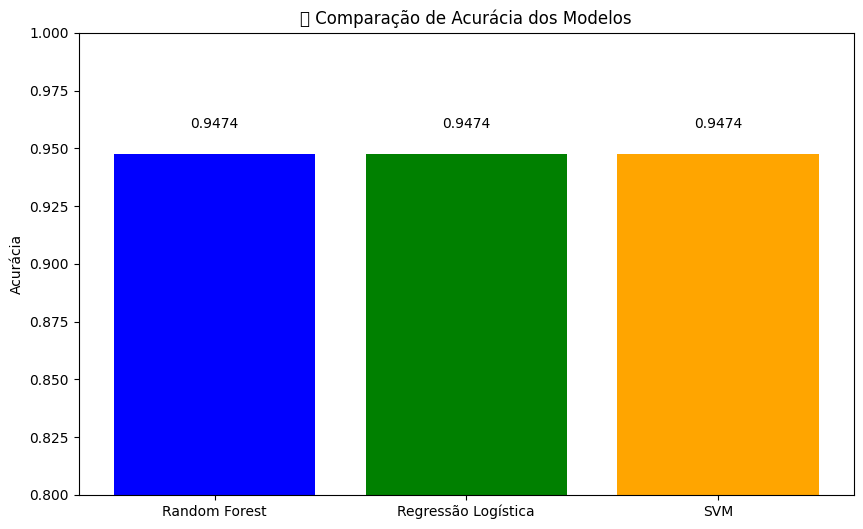

In [ ]:
# Visualizar comparação de modelos
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

bars = plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])
plt.title('Comparação de Acurácia dos Modelos')
plt.ylabel('Acurácia')
plt.ylim(0.8, 1.0)

# Adicionar valores nas barras
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.4f}', ha='center', va='bottom')

plt.show()

/mnt/HD/Projetos/Programação/python-ew/machine_learning_rec/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


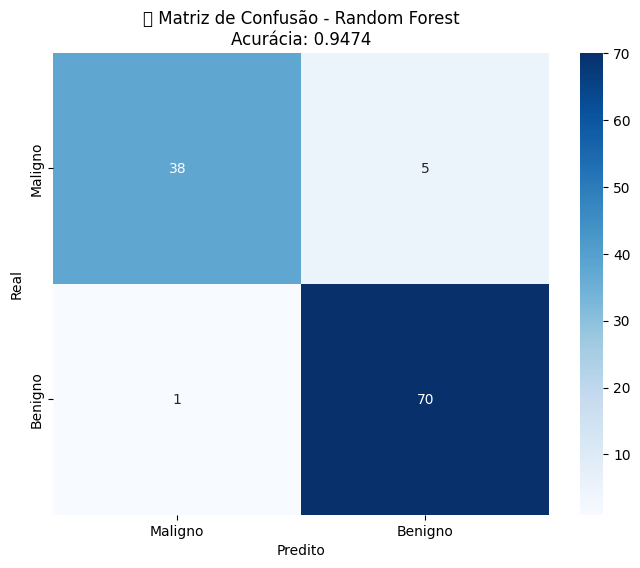

In [ ]:
# Matriz de confusão do melhor modelo
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
y_pred_best = results[best_model_name]['predictions']

plt.figure(figsize=(8, 6))
m = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Maligno', 'Benigno'], 
            yticklabels=['Maligno', 'Benigno'])
plt.title(f'Matriz de Confusão - {best_model_name}\nAcurácia: {results[best_model_name]["accuracy"]:.4f}')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

/tmp/ipykernel_13537/1964739540.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/mnt/HD/Projetos/Programação/python-ew/machine_learning_rec/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


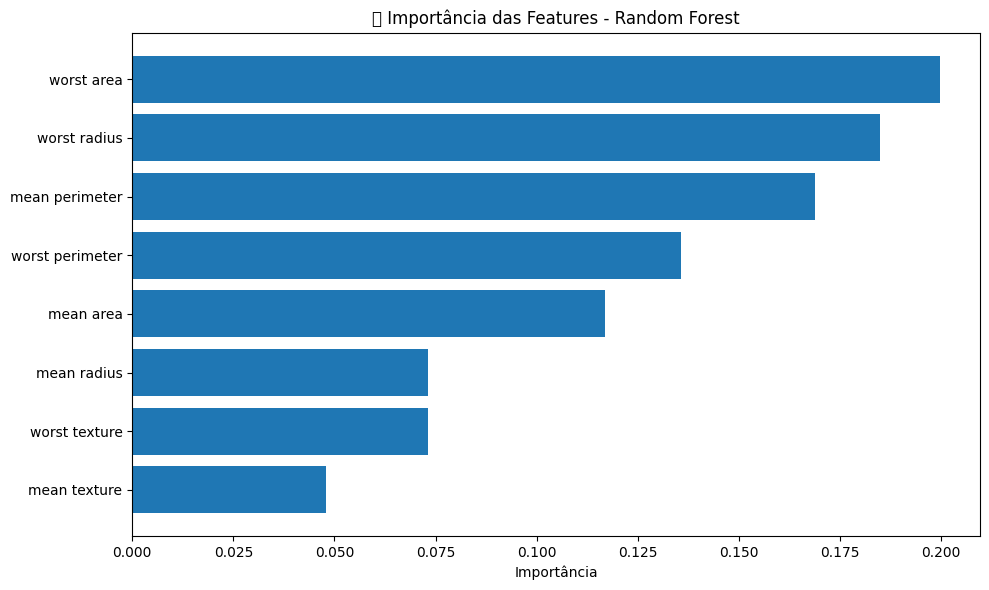


🎉 MELHOR MODELO: Random Forest
📈 ACURÁCIA: 0.9474
💡 SIGNIFICADO: Nosso modelo identificaria 94.7% dos casos corretamente!


In [ ]:
# Feature Importance (apenas para Random Forest)
if best_model_name == 'Random Forest':
    feature_importance = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'feature': features_importantes,
        'importance': feature_importance
    }).sort_values('importance', ascending=True)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
    plt.title('Importância das Features - Random Forest')
    plt.xlabel('Importância')
    plt.tight_layout()
    plt.show()

print(f"\nMELHOR MODELO: {best_model_name}")
print(f"ACURÁCIA: {results[best_model_name]['accuracy']:.4f}")
print(f"SIGNIFICADO: Nosso modelo identificaria {results[best_model_name]['accuracy']*100:.1f}% dos casos corretamente!")